Load one image from each class (SSA / HP)

In [2]:
from PIL import Image #import pillow

img_train = Image.open('C:\\Users\\xiuli\\MHIST\\folder\\images\\MHIST_aaa.png') #use one SSA image
print(img_train)

img_test = Image.open('C:\\Users\\xiuli\\MHIST\\folder\\images\\MHIST_aag.png') #use one HP image
print(img_test)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x1AC132E3350>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x1AC13359810>


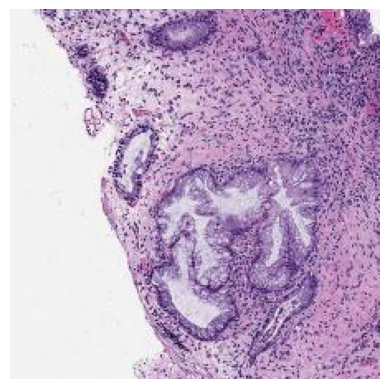

In [3]:
import matplotlib.image as mpimg #import matplotlib
import matplotlib.pyplot as plt

imgplot = plt.imshow(img_train) #show the image
plt.axis('off')
plt.show()

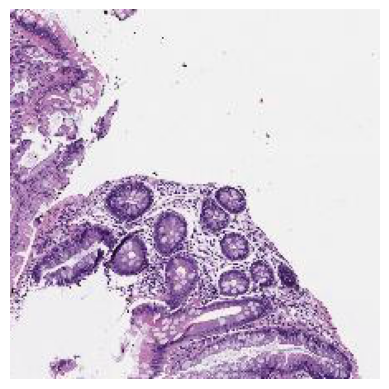

In [3]:
imgplot = plt.imshow(img_test) #show the image
plt.axis('off')
plt.show()

Load every data into huge x,y

In [4]:
import glob #import glob
import os

image_list = glob.glob('C:\\Users\\xiuli\\MHIST\\folder\\images\\*.png') #use glob to get list

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

annotations = pd.read_csv("annotations.csv")
labels = annotations["Majority Vote Label"]

newlist = labels.tolist()

binary = []

for n in range(len(newlist)):
    if newlist[n] == "SSA":
        binary.append(0)
    else:
        binary.append(1)

In [9]:
import keras

train_dataset, test_dataset = keras.utils.image_dataset_from_directory(
    directory=r"C:\Users\xiuli\MHIST\folder\images",
    labels=binary,
    label_mode="binary",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=0,
    validation_split=0.2,
    subset="both",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 3152 files belonging to 2 classes.
Using 2522 files for training.
Using 630 files for validation.


In [6]:
import keras
from keras import layers

input_shape = (224, 224, 3)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(3, kernel_size=(7, 7), activation="relu"),  #downsize the image size
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(10, kernel_size=(7, 7), activation="relu"), #downsize again
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(), #flatten into 1-D
        layers.Dropout(0.2), #dropout rate of 20% probability
        layers.Dense(1, activation="sigmoid"), #put it into the 1 element, and use sigmoid to turn it into 0 or 1
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 218, 218, 3)    │           444 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 109, 109, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 103, 103, 10)   │         1,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 51, 51, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 26010)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26010)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        26,011 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,935 (109.12 KB)

 Trainable params: 27,935 (109.12 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
batch_size = 128
epochs = 15

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(
    x=train_dataset,
    y=None,
    batch_size=batch_size,
    epochs=epochs,
    verbose="auto",
    callbacks=None,
    validation_split=0.0,
    validation_data=test_dataset,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
)

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - accuracy: 0.5979 - loss: 81.9760 - val_accuracy: 0.5635 - val_loss: 0.6947
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.6075 - loss: 0.6894 - val_accuracy: 0.6286 - val_loss: 0.6844
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.6725 - loss: 0.6756 - val_accuracy: 0.6524 - val_loss: 0.6762
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.6751 - loss: 0.6636 - val_accuracy: 0.6667 - val_loss: 0.6691
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.6895 - loss: 0.6533 - val_accuracy: 0.6683 - val_loss: 0.6626
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 177ms/step - accuracy: 0.6977 - loss: 0.6347 - val_accuracy: 0.6746 - val_loss: 0.6536
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 176ms/step - accuracy: 0.6941 - loss: 0.6428 - val_accuracy: 0.6746 - val_loss: 0.6498
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 14s 178ms/step - accuracy: 0.7063 - loss: 0.6324 - val_acc

In [12]:
score = model.evaluate(test_dataset, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6736562848091125
Test accuracy: 0.6507936716079712


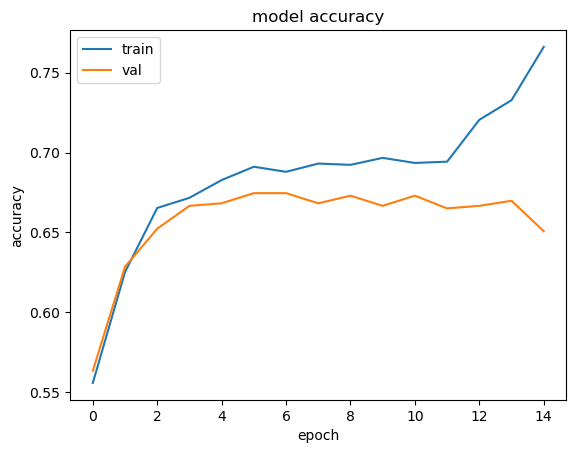

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

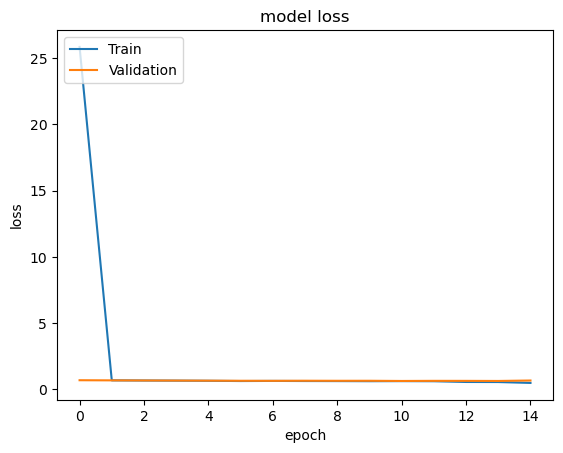

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()